Sascha Spors,
Professorship Signal Theory and Digital Signal Processing,
Institute of Communications Engineering (INT),
Faculty of Computer Science and Electrical Engineering (IEF),
University of Rostock,
Germany

# Tutorial Digital Signal Processing

**IIR / FIR Filter Examples**,
Winter Semester 2020/21 (Master Course #24505)

- lecture: https://github.com/spatialaudio/digital-signal-processing-lecture
- tutorial: https://github.com/spatialaudio/digital-signal-processing-exercises

Feel free to contact lecturer frank.schultz@uni-rostock.de

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
matplotlib.rcParams['font.size'] = 8
fsz = (16*0.8, 9*0.8)  # fig size

fs = 48000  # sampling frequency in Hz
Nt = 2**12


def impz(b=1, a=1, Nt=2**12, fs=48000):
    t = np.arange(0, Nt) / fs
    dirac = np.zeros(Nt)
    dirac[0] = 1
    return t, signal.lfilter(b, a, dirac)


def plot_system(ttl):
    t, h = impz(b, a, Nt, fs)
    W, H = signal.freqz(b, a, Nt)
    W, gdly = signal.group_delay((b, a), W)

    plt.figure(figsize=fsz)
    plt.subplot(2, 2, 1)
    plt.semilogx(W/np.pi*fs/2, 20*np.log10(np.abs(H)))
    plt.xlim(10, 20000)
    plt.grid()
    plt.xlabel(r'$f$ / Hz')
    plt.ylabel(r'$20\mathrm{log}_{10}|H|$ / dB')
    plt.title('Level Response: ' + ttl)
    plt.ylim(-40, 10)

    plt.subplot(2, 2, 2)
    plt.semilogx(W/np.pi*fs/2, (np.angle(H))*180/np.pi)
    plt.xlim(10, 20000)
    plt.grid()
    plt.xlabel(r'$f$ / Hz')
    plt.ylabel(r'$\phi$ / deg')
    plt.title('Phase Response')

    plt.subplot(2, 2, 3)
    plt.plot(t*1000, h)
    plt.xlim(-1, 10)
    plt.grid()
    plt.xlabel(r'$t$ / ms')
    plt.ylabel(r'h(t)')
    plt.title('Impulse Response')

    plt.subplot(2, 2, 4)
    plt.semilogx(W/np.pi*fs/2, gdly/fs*1000)
    plt.xlim(10, 20000)
    plt.ylim(-2, 6)
    plt.grid()
    plt.xlabel(r'$f$ / Hz')
    plt.ylabel(r'$t$ / ms')
    plt.title("Group Delay")

# 2021-01-07:
# functions below taken from
# https://github.com/spatialaudio/digital-signal-processing-lecture/blob/master/filter_design/audiofilter.py
# SHA: 98d6fcfdccab2182ba500625a12408dc4e189913


def biquad_lp2nd(fc, fs, bi=1., ai=np.sqrt(2)):
    """Calc coeff for lowpass 2nd order.

    input:
    fc...cut frequency in Hz
    fs...sampling frequency in Hz
    bi, ai...filter characteristics coefficients, e.g.
    bi = 0.6180, ai = 1.3617 for Bessel 2nd order
    bi = 1, ai = 1.4142 for Butterworth 2nd order (default)
    output:
    B...numerator coefficients Laplace transfer function
    A...denominator coefficients Laplace transfer function
    b...numerator coefficients z-transfer function
    a...denominator coefficients z-transfer function
    """
    wc = 2*np.pi*fc
    B = np.array([0., 0, 1])
    A = np.array([bi / wc**2, ai / wc, 1])

    wcpre = f_prewarping(fc, fs)
    Bp = 0., 0., 1.
    Ap = bi / wcpre**2, ai / wcpre, 1.
    b, a = bilinear_biquad(Bp, Ap, fs)

    return B, A, b, a


def f_prewarping(f, fs):
    """Do the frequency prewarping.

    input:
    f...analog frequency in Hz to be prewarped
    fs...sampling frequency in Hz
    output:
    prewarped angular frequency in rad/s
    """
    return 2*fs*np.tan(np.pi*f/fs)


def bilinear_biquad(B, A, fs):
    """Get the bilinear transform of a 2nd-order Laplace transform.

    bilinear transform H(s)->H(z) with s=2*fs*(z-1)/(z+1)

    input:
    B[0] = B0   B[1] = B1   B[2] = B2
    A[0] = A0   A[1] = A1   A[2] = A2
    fs...sampling frequency in Hz
           Y(s)   B0*s^2+B1*s+B2   B[0]*s^2+B[1]*s+B[2]
    H(s) = ---- = -------------- = --------------------
           X(s)   A0*s^2+A1*s+A2   A[0]*s^2+A[1]*s+A[2]
    output:
    b[0] = b0   b[1] = b1   b[2] = b2
    a[0] = 1    a[1] = a1   a[2] = a2
           Y(z)   b2*z^-2+b1*z^-1+b0   b[2]*z^-2+b[1]*z^-1+b[0]
    H(z) = ---- = ------------------ = ------------------------
           X(z)   a2*z^-2+a1*z^-1+ 1   a[2]*z^-2+a[1]*z^-1+a[0]
    """
    A0, A1, A2 = A
    B0, B1, B2 = B
    fs2 = fs**2

    a0 = A2 + 2*A1*fs + 4*A0*fs2
    b0 = B2 + 2*B1*fs + 4*B0*fs2

    b1 = 2*B2 - 8*B0*fs2
    a1 = 2*A2 - 8*A0*fs2

    b2 = B2 - 2*B1*fs + 4*B0*fs2
    a2 = A2 - 2*A1*fs + 4*A0*fs2

    b = np.array([b0, b1, b2]) / a0
    a = np.array([a0, a1, a2]) / a0

    return b, a

# Basic Filter Characteristics

## Gain as FIR Filter

1.7782794100389228


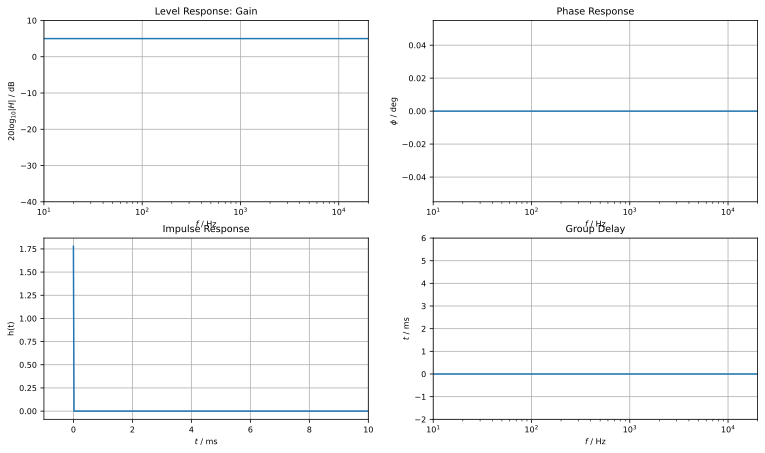

In [2]:
b = np.zeros(Nt)
b[0] = 10**(+5/20)
a = 1
plot_system("Gain")
print(b[0])

## Attenuation as FIR Filter

0.31622776601683794


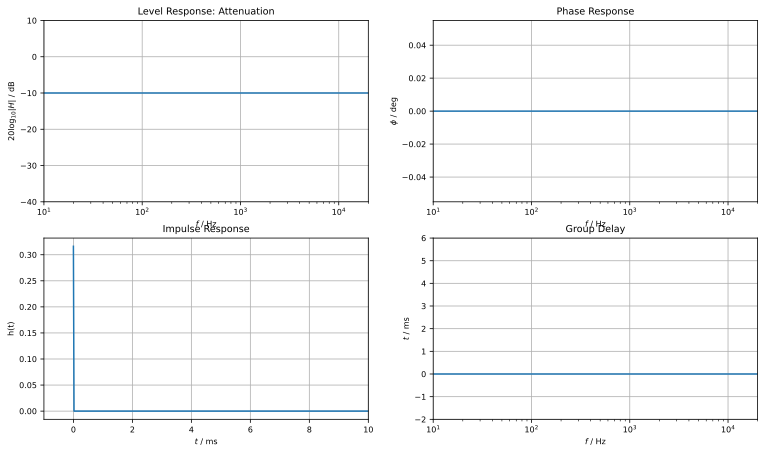

In [3]:
b = np.zeros(Nt)
b[0] = 10**(-10/20)
a = 1
plot_system("Attenuation")
print(b[0])

## Delay as FIR Filter

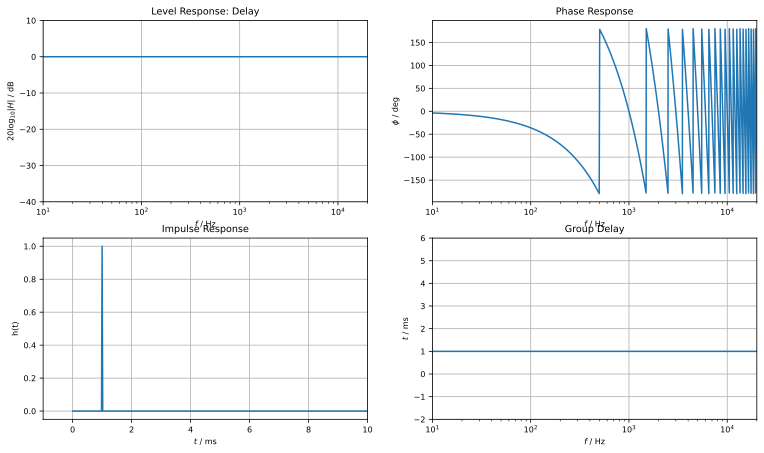

In [4]:
b = np.zeros(Nt)
b[0] = 0
# 1 ms Delay, what is the Phase Response telling us
b[int(np.ceil(1/1000*fs))] = 1
a = 1
plot_system("Delay")  # here the Delay is modeled as an FIR filter

## Combfilter as FIR Filter

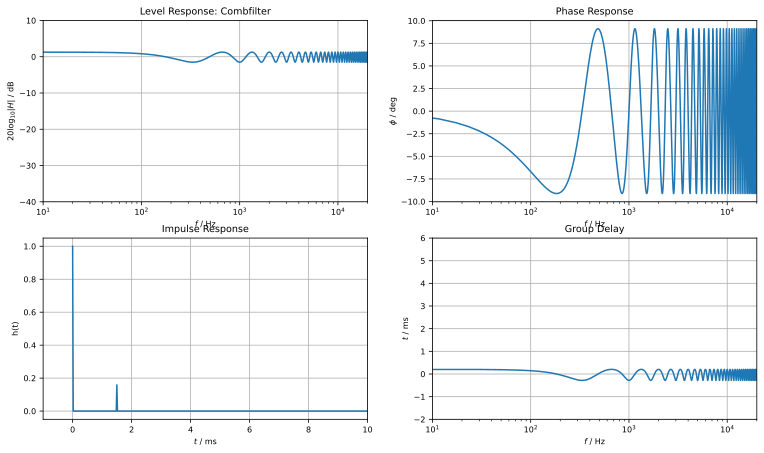

In [5]:
# 1.5ms delay & -16dB -> these are the max values 
# to realize maximum stereo perception cues between left / right loudspeaker
b = np.zeros(200)
b[0] = 1
b[int(np.ceil(1.5/1000*fs))] = 10**(-16/20)
a = 1
plot_system("Combfilter")

## Butterworth Lowpass

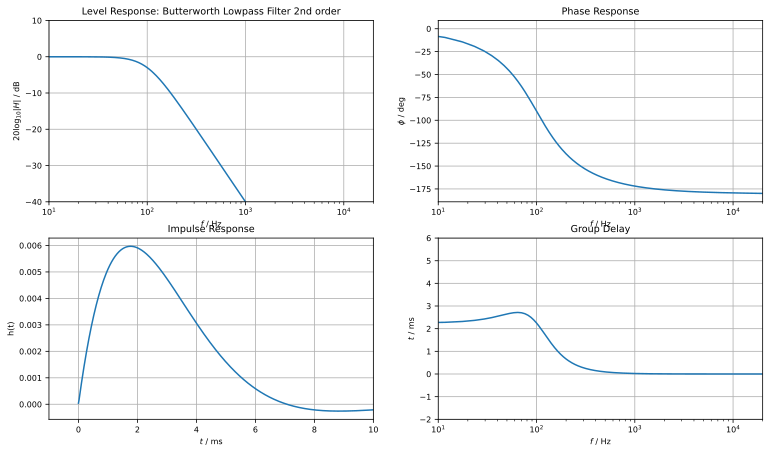

In [6]:
fc = 100  # Hz
B, A, b, a = biquad_lp2nd(fc, fs)
plot_system("Butterworth Lowpass Filter 2nd order")

## Linear Phase Finite Impulse Response (FIR) Filters

In the examples for type I, III, II and IV the coefficients in b are made up by random values. Thus, also the Level and Impulse Response are of arbitrary shape, which we are not really interested in.

Rather, it is important to realize that the **group delay is constant over frequency** and the **impulse response** has **certain symmetry** over time for these linear phase filter types.

### Type I

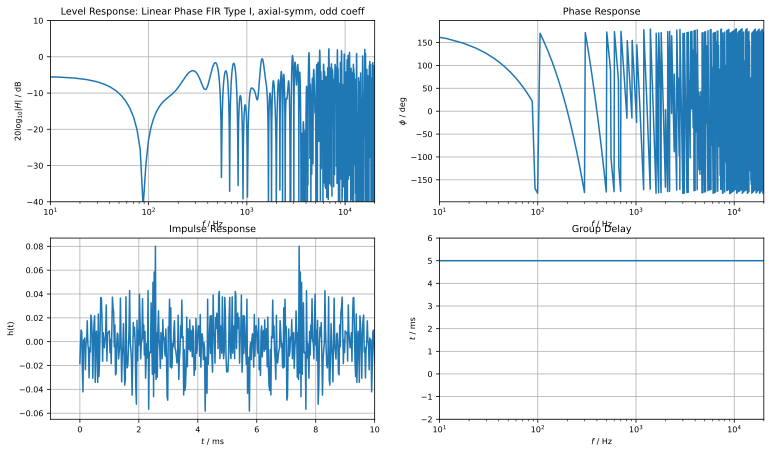

In [7]:
NFIR = 481  #481 => 0.5 ms group delay at fs=48 kHz
b = np.random.randn(NFIR) / 40
tmp = b[0:int((NFIR-1)/2)]
b = np.concatenate((tmp[::], b[int((NFIR-1)/2)], +tmp[::-1]), axis=None)
a = 1
plot_system("Linear Phase FIR Type I, axial-symm, odd coeff")

### Type III

/Users/fs446/opt/anaconda3/envs/mydsp/lib/python3.8/site-packages/scipy/signal/filter_design.py:689: UserWarning: The group delay is singular at frequencies [0.000], setting to 0
  warnings.warn(
<ipython-input-1-9a55f0442144>:26: RuntimeWarning: divide by zero encountered in log10
  plt.semilogx(W/np.pi*fs/2, 20*np.log10(np.abs(H)))


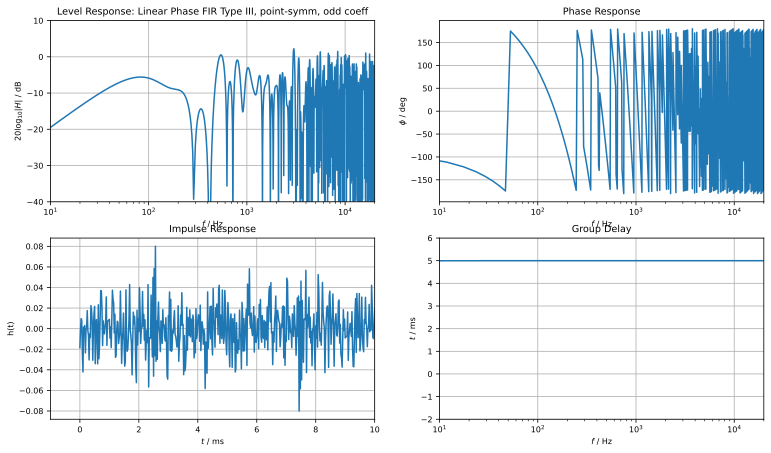

In [8]:
NFIR = 481  #0.5 ms group delay at fs=48 kHz
b = np.random.randn(NFIR) / 40
b = np.concatenate((tmp[::], 0, -tmp[::-1]), axis=None)
a = 1
plot_system("Linear Phase FIR Type III, point-symm, odd coeff")

### Type II

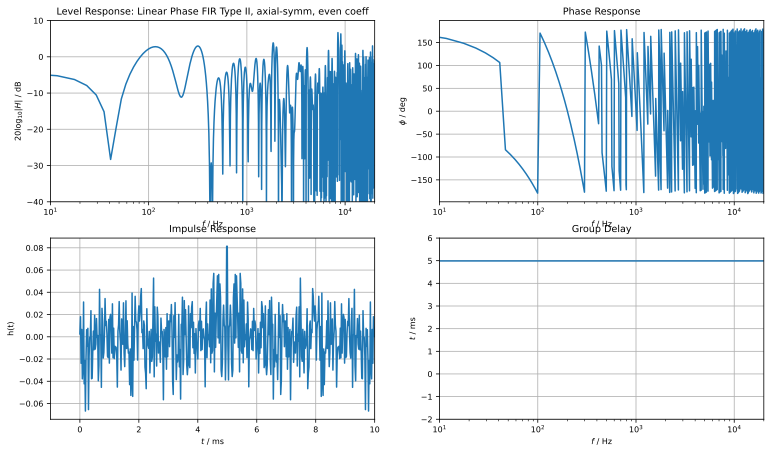

In [9]:
NFIR = 480  #0.5 ms group delay at fs=48 kHz
b = np.random.randn(NFIR) / 40
tmp = b[0:int(NFIR/2)]
b = np.concatenate((tmp[::], +tmp[::-1]), axis=None)
a = 1
plot_system("Linear Phase FIR Type II, axial-symm, even coeff")

### Type IV

/Users/fs446/opt/anaconda3/envs/mydsp/lib/python3.8/site-packages/scipy/signal/filter_design.py:689: UserWarning: The group delay is singular at frequencies [0.000], setting to 0
  warnings.warn(
<ipython-input-1-9a55f0442144>:26: RuntimeWarning: divide by zero encountered in log10
  plt.semilogx(W/np.pi*fs/2, 20*np.log10(np.abs(H)))


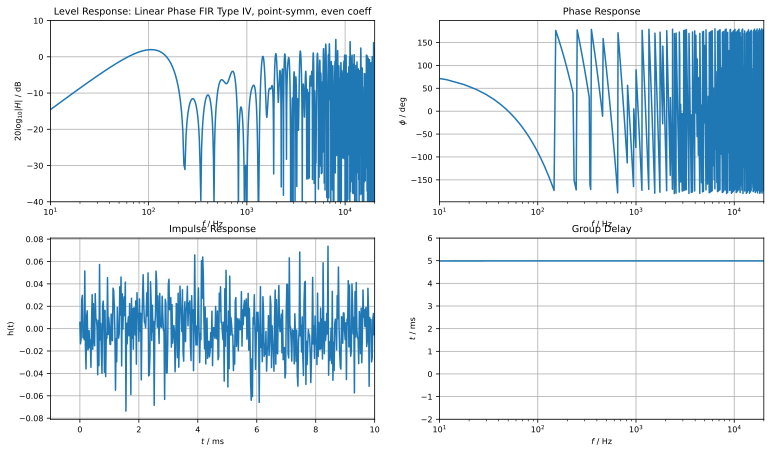

In [10]:
NFIR = 480  #0.5 ms group delay at fs=48 kHz
b = np.random.randn(NFIR) / 40
tmp = b[0:int(NFIR/2)]
b = np.concatenate((tmp[::], -tmp[::-1]), axis=None)
a = 1
plot_system("Linear Phase FIR Type IV, point-symm, even coeff")

## Linearphase Lowpass FIR Type I 

<ipython-input-1-07851e02ac68>:3: RuntimeWarning: invalid value encountered in true_divide
  b = np.sin(np.pi/4*n) / (np.pi*n)  # fcut = 6 kHz at fs=48 kHz


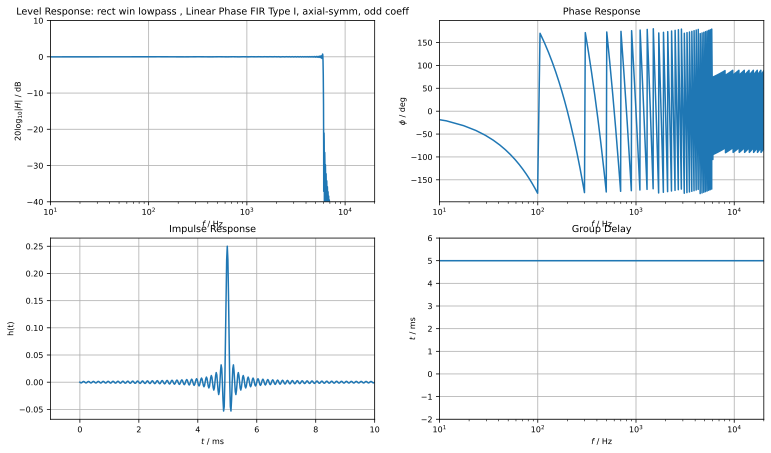

In [11]:
NFIR = 481  #0.5 ms group delay at fs=48 kHz
n = np.arange(0,NFIR) 
b = np.sin(np.pi/4*n) / (np.pi*n)  # fcut = 6 kHz at fs=48 kHz
b[0] = 1/4  # L'Hospital rule
tmp = b[1:int((NFIR-1)/2)+1]
b = np.concatenate((tmp[::-1], b[0], +tmp[::]), axis=None)
a = 1
plot_system("rect win lowpass , Linear Phase FIR Type I, axial-symm, odd coeff")


# **Copyright**

The notebooks are provided as [Open Educational Resources](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebooks for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Frank Schultz, Digital Signal Processing - A Tutorial Featuring Computational Examples* with the URL https://github.com/spatialaudio/digital-signal-processing-exercises